# Random Forest Model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("selected_heartdata.csv")

In [3]:
df.head()

,HeartDisease,GenHealth,AgeCategory,DiffWalking,PhysicalHealth
0,0,3,5,0,3.0
1,0,3,0,0,0.0
2,0,2,1,0,0.0
3,0,1,0,0,0.0
4,0,2,3,1,0.0


In [4]:
#Define dependent variables
Y = df['HeartDisease'].values

#Define independent variables
X = df.drop(labels=['HeartDisease'],axis=1)

In [5]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

In [6]:
from sklearn.ensemble import RandomForestClassifier #use classifier cuz its binary Y

model = RandomForestClassifier(n_estimators = 10, random_state=30)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10, random_state=30)

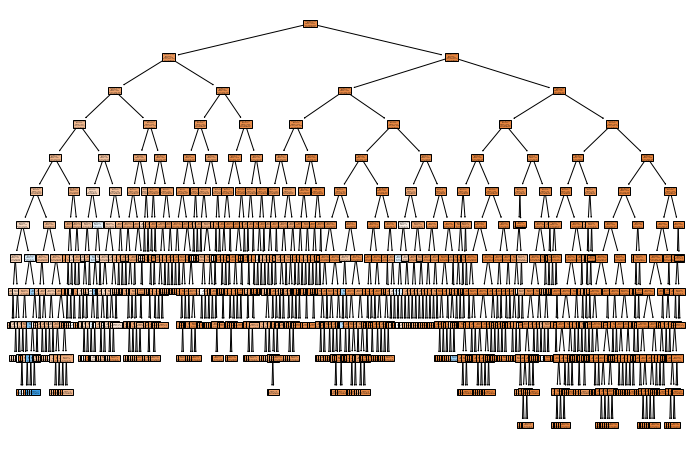

In [7]:
from sklearn import tree

tree_in_forest = model.estimators_[0]
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_in_forest, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [8]:
prediction_test = model.predict(X_test)

In [9]:
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(Y_test,prediction_test))

Accuracy =  0.9336716406647928


In [10]:
#Feature importance (higher number, higher importance)
feature_list = list(X.columns)
feature_imp=pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

AgeCategory       0.555544
GenHealth         0.322101
DiffWalking       0.079040
PhysicalHealth    0.043315
dtype: float64
